In [1]:
import numpy as np

from probability_distribution import mu_gaussians, mu_display2D
from fourier_functions import Fourier_Functions, Fourier_Functions_Visualize2D


0.36791950647965144


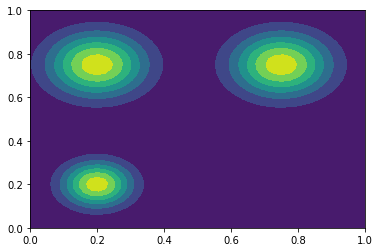

In [2]:
U_shape = (1,1)
n = len(U_shape)
mu = mu_gaussians([(0.2, 0.01), (0.75, 0.02), (np.array([0.2, 0.75]), 0.02)], U_shape)
print(mu(np.array([0.2,0.3])))
mu_display2D(mu, U_shape)


In [3]:
K = 3
ff3 = Fourier_Functions(mu, U_shape, K, printProgress=True)

Fourier Functions (mu, U_shape= (1, 1) , K= 3 )...
Computing constants (new_k, h_k, lambda_k)...
Computing torch fourier functions (f_k, df_k)...
Computing mu fourier coefficients (mu_k)... this will take a while because integration...
Computing casadi fourier function (casadi_f_k)...
Aggregating all constants and functions into one dict...
Done.


In [4]:
K = 5
ff5 = Fourier_Functions(mu, U_shape, K, printProgress=True)

Fourier Functions (mu, U_shape= (1, 1) , K= 5 )...
Computing constants (new_k, h_k, lambda_k)...
Computing torch fourier functions (f_k, df_k)...
Computing mu fourier coefficients (mu_k)... this will take a while because integration...
Computing casadi fourier function (casadi_f_k)...
Aggregating all constants and functions into one dict...


TypeError: 'float' object is not iterable

In [6]:
import pickle 
mu_k5 = {}
for k in ff5:
    mu_k5[k] = ff5[k]['mu_k']

with open('mu_k5.pkl', 'wb') as handle:
    pickle.dump(mu_k5, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('mu_k5.pkl', 'rb') as handle:
    mu_k5_2 = pickle.load(handle)

print(mu_k5 == mu_k5_2)

True


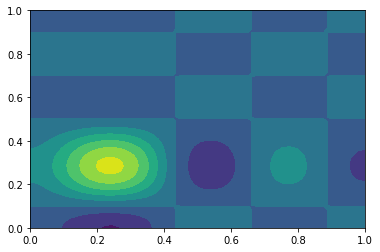

In [4]:
x = np.array([0.2, 0.3])
def fourier_coefficient2distribution(ff, k_bands, c_k=None):
    def dist(x):
        res = 0
        for k in k_bands:
            if c_k is None:
                coeff_k = ff[k]['mu_k']
            else:
                coeff_k = c_k[k]
            res += coeff_k*ff[k]['f_k'](x)
        return res
    return dist
n = len(U_shape)
all_k5 = list(np.ndindex(*[K]*n))
c_k = {}
for k in all_k5:
    c_k[k] = ff5[k]['f_k'](x)
recon5 = fourier_coefficient2distribution(ff5, list(np.ndindex(*[K]*n)), c_k)
mu_display2D(recon5, U_shape)

In [4]:
K = 10
ff10 = Fourier_Functions(mu, U_shape, K, printProgress=True)

Fourier Functions (mu, U_shape= (1, 1) , K= 10 )...
Computing constants (new_k, h_k, lambda_k)...
Computing torch fourier functions (f_k, df_k)...
Computing mu fourier coefficients (mu_k)... this will take a while because integration...
Computing casadi fourier function (casadi_f_k)...
Aggregating all constants and functions into one dict...
Done.


In [6]:
import pickle
mu_k10 = {}
for k in ff10:
    mu_k10[k] = ff10[k]['mu_k']

with open('mu_k10.pkl', 'wb') as handle:
    pickle.dump(mu_k10, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('mu_k10.pkl', 'rb') as handle:
    mu_k10_2 = pickle.load(handle)

print(mu_k10 == mu_k10_2)

True


Reconstructed mu

In [6]:
def fourier_coefficient2distribution(ff, k_bands, c_k=None):
    def dist(x):
        res = 0
        for k in k_bands:
            if c_k is None:
                coeff_k = ff[k]['mu_k']
            else:
                coeff_k = c_k[k]
            res += coeff_k*ff[k]['f_k'](x)
        return res
    return dist

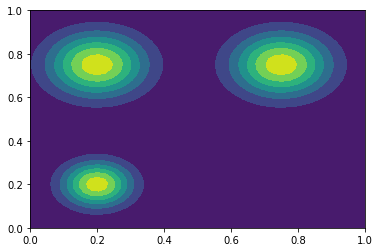

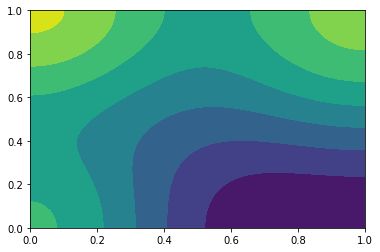

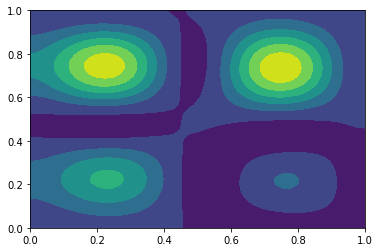

In [7]:
all_k_band3 = list(np.ndindex(*[3]*n))
all_k_band5 = list(np.ndindex(*[5]*n))
# all_k_band10 = list(np.ndindex(*[10]*n))

recon_mu3 = fourier_coefficient2distribution(ff3, all_k_band3)
recon_mu5 = fourier_coefficient2distribution(ff5, all_k_band5)
# recon_mu10 = fourier_coefficient2distribution(ff10, all_k_band10)
print("displaying...")
mu_display2D(mu, U_shape)
mu_display2D(recon_mu3, U_shape)
mu_display2D(recon_mu5, U_shape)
# mu_display2D(recon_mu10, U_shape)

displaying...


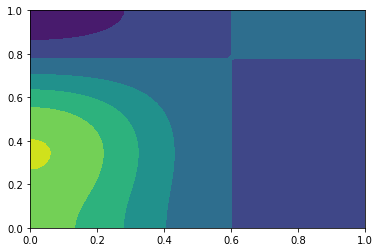

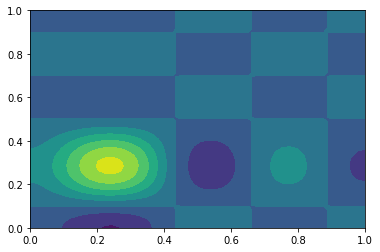

In [9]:
init_pos = np.array([0.2,0.3])
c_k = {k: ff5[k]['f_k'](init_pos) for k in all_k_band5}
recon_c_k3 = fourier_coefficient2distribution(ff3, all_k_band3, c_k)
recon_c_k5 = fourier_coefficient2distribution(ff5, all_k_band5, c_k)
print("displaying...")
mu_display2D(recon_c_k3, U_shape)
mu_display2D(recon_c_k5, U_shape)